## Crops
- Apple
- Corn
- Grape
- Pepper
- Potato
- Tomato

## Class Codes
- Apple_Healthy
- Apple_Apple_Scab
- Apple_Black_rot 
- Apple_Cedar_Apple_rust 
- Corn_healthy 
- Corn_Cercospora_leaf_spot 
- Corn_Common_rust
- Corn_Northern_Leaf_Blight
- Grape_Healthy
- Grape_Esca
- Grape_Leaf_Blight
- Pepper_Healthy
- Pepper_Bacterial_Spot
- Potato_Healthy
- Potato_Early_Blight
- Potato_Late_Blight
- Tomato_Healthy
- Tomato_Early_blight
- Tomato_Leaf_mold
- Tomato_Mosaic_Virus
- Grape_black_rut

In [7]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
import cv2

In [10]:
def confusion_matrix_visual(y_test, pred_test,model):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap="Reds")
    plt.title(f'Confusion Matrix - Maize Classification {model}-model')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    plt.show()
    
    print(f'Classification Report - Maize Classification {model}-model')
    print(classification_report(y_test,pred_test))


def read_data():
    """
    Reads Image Files from Current Working Directory
    and returns A list of paths to each image and their CLass names
    
    """
    root_dir = os.path.join(os.getcwd(), "Data\\")
    class_names = []
    paths = []
    for folder in os.listdir(root_dir):
        subdir = os.path.join(root_dir, f"{folder}\\")
        for eachfile in os.listdir(subdir):
            class_names.append(int(folder))
            paths.append(os.path.join(subdir, f"{eachfile}"))

    return paths, class_names

def process_img():
    """
    Takes in the paths and tags from the read_data module and 
    process the image by
    1. Loading the Image
    2. Converting the Image Object to Array
    3. Normalizing over the image  by dividing by 255 which is the max obtaining value for the color code
    It returns a numpy array of images and tags
    """
    paths, tags = read_data()
    images = []
    for i in range(len(paths)):
        image = cv2.imread(paths[i])
        image = cv2.resize(image, (100, 100)).flatten()
        images.append(image)
    
    data = np.array(images, dtype="uint8") / 255.0
    
    tags = np.array(tags)
    return(data, tags)

def plot_metrics(X,y_main,model, model_type="CNN"):
    y_pred = model.predict(X)
    y_pred_list = [np.where(y_pred[i]== max(y_pred[i]))[0][0] for i in range(y_pred.shape[0]) ]
    
    confusion_matrix_visual(y_main,y_pred_list,model_type)


In [ ]:
X_pan, y_pan = process_img()

In [3]:
X, y = process_img()
train_images,  test_images,train_labels, test_labels = train_test_split(X,y, test_size=0.3)

In [4]:
print(len(y))

13850


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(21))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
303/303 [==============================] - 3385s 11s/step - loss: 1.5629 - accuracy: 0.5323 - val_loss: 0.9880 - val_accuracy: 0.6842
Epoch 2/10
303/303 [==============================] - 3711s 12s/step - loss: 0.6309 - accuracy: 0.7876 - val_loss: 0.8502 - val_accuracy: 0.7329
Epoch 3/10
303/303 [==============================] - 3803s 13s/step - loss: 0.3255 - accuracy: 0.8912 - val_loss: 0.8714 - val_accuracy: 0.7473
Epoch 4/10
303/303 [==============================] - 3770s 12s/step - loss: 0.1830 - accuracy: 0.9397 - val_loss: 0.6503 - val_accuracy: 0.8245
Epoch 5/10
303/303 [==============================] - 3656s 12s/step - loss: 0.1338 - accuracy: 0.9549 - val_loss: 0.6841 - val_accuracy: 0.8205
Epoch 6/10
303/303 [==============================] - 3829s 13s/step - loss: 0.0903 - accuracy: 0.9696 - val_loss: 0.7572 - val_accuracy: 0.8284
Epoch 7/10
303/303 [==============================] - 3883s 13s/step - loss: 0.1067 - accuracy: 0.9668 - val_loss: 1.1136 - val_ac

In [ ]:
plt.figure(figsize = [10,8])
plt.plot(model.history.history["loss"], label="train_loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss (CNN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.savefig("trainingdataloss(CNN).jpg")
plt.show()

In [ ]:
# plot the training and validation accuracy
plt.figure(figsize = [10,8])
plt.plot(model.history.history["accuracy"], label="train_acc")
plt.plot(model.history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy (CNN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.savefig("trainingdataAccuracy(CNN).png")
plt.show()

In [44]:
# evaluate the network
print("[Classification Report] evaluating Convolutional Neural Network Using Test Data...")
predictions = model.predict(test_images, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1)))#, target_names=lb.classes_))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       1.00      0.40      0.57         5
           2       1.00      0.60      0.75         5
           3       1.00      0.80      0.89         5
          12       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0

    accuracy                           0.65        20
   macro avg       0.45      0.33      0.36        20
weighted avg       0.89      0.65      0.72        20



C:\Users\DANIEL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DANIEL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DANIEL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
class_codes={
    0:"Apple_Healthy", 1:"Apple_Scab", 2:"Apple_Black_rot", 3:"Apple_Cedar_rust", 
    4:"Corn_Healthy", 5:"Corn_Cercospora_leaf", 6:"Corn_Common_rust", 7:"Corn_Northern_Leaf_Blight",
    8:"Grape_Healthy", 20:"Grape_Black_Rut", 9:"Esca",10:"Grape_Blight",
    1`:"Pepper_Healthy", 12:"Pepper_Bacterial_Spot",
    13:"Potato_Healthy", 14:"Potato_Early_Blight",15:"Potato_Late_Blight",
    16:"Tomato_Healthy", 17:"Tomato_Early_Blight", 18:"Tomato_Leaf_Mold",19:"Tomato_Mosaic_virus"
}

In [8]:
model.save("./models/LeafModel")

INFO:tensorflow:Assets written to: ./data/LeafModel\assets


In [16]:
model.history.history["loss"]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

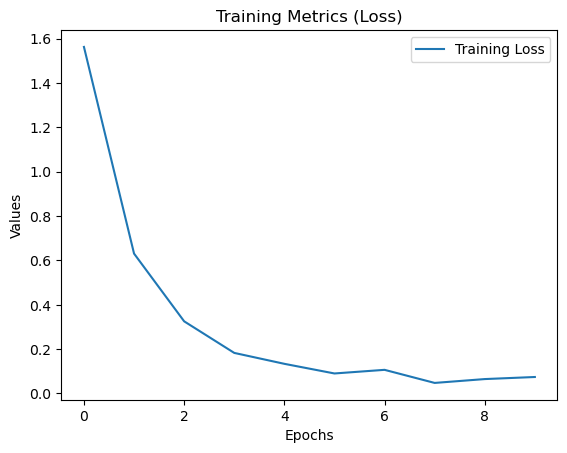

In [33]:
plt.plot(model.history.history["loss"], label="Training Loss")
plt.title("Training Metrics (Loss)")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.legend()
plt.show()

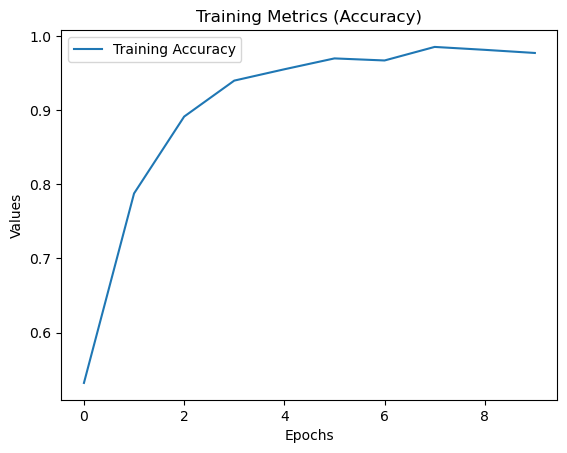

In [34]:
plt.plot(model.history.history["accuracy"], label="Training Accuracy")
plt.title("Training Metrics (Accuracy)")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.legend()
plt.show()

In [37]:
pred_path = os.path.join(os.getcwd(),"pred_set")
pred_class = [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]
pred_img = []
for eachone in os.listdir(pred_path):
    pred_img.append(os.path.join(pred_path,eachone))

In [ ]:
pro_images = []
for eachone in pred_img:
    pro_images.append(img_to_array(load_img(eachone))/255)

In [ ]:
pro_images = np.asarray(pro_images)
pred_class = np.asarray(pred_class)

In [ ]:
test_pred = np.argmax(model.predict(pro_images[0:1]))
test_pred

In [ ]:
print(classification_report(pred_class, test_pred))

In [ ]:
load_img(paths[5])

In [ ]:
#Normalize the image
images = np.array(images)

In [ ]:
images.shape

In [ ]:
len(train_ims)

In [ ]:
fig=plt.figure(figsize=(10, 10))
img = cv2.imread(paths[199])
#print(image_files[i], img)
fig.add_subplot(1, 1,1)
plt.imshow(img)

In [3]:
model = models.load_model("./models/LeafModel")

In [4]:
model.save("leaf.h5")